In [1]:
import numpy as np
from typing import List, Tuple, Callable, Mapping
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns



In [2]:
def plot_timing(mx_list, tf_list):
    mx_s = pd.Series(mx_list)
    tf_s = pd.Series(tf_list)

    df = pd.concat([mx_s, tf_s], axis=1)
    df = df.rename(columns = {0:"mxnet", 1:"tensorflow"})
    return df.plot()

In [3]:
def plot_time_vs_seed_line_errorbar(df_result):
    # df_result should have 3 columns at least
    # two columns for the timing of the two frameworks
    # one last to record the seed, so to understand 
    # which timings (i.e. rows) are referred to the same exact
    # bag of vectors (that should represent the difficulty of the experiment)
    
    df_averaged = df_result.groupby('seed').mean()
    df_max = df_result.groupby('seed').max()
    df_min = df_result.groupby('seed').min()
    df_positive_error = df_max - df_averaged
    df_negative_error = df_averaged - df_min
    
    fig = plt.figure()
    fig.set_size_inches(18.5, 9)
    plt.errorbar(df_averaged.index, df_averaged["mxnet"], yerr=[df_negative_error["mxnet"], df_positive_error["mxnet"]])
    plt.errorbar(df_averaged.index, df_averaged["tensorflow"], yerr=[df_negative_error["tensorflow"], df_positive_error["tensorflow"]])
    plt.show()
    #df_averaged[["mxnet","tensorflow"]].plot()
def plot_time_vs_dimension_line_errorbar(df_result, max_value): 
    # df_result should have 3 columns at least
    # two columns for the timing of the two frameworks
    # one last to record the seed, so to understand 
    # which timings (i.e. rows) are referred to the same exact
    # bag of vectors (that should represent the difficulty of the experiment)
    
    df_averaged = df_result.groupby('dim').mean()
    df_max = df_result.groupby('dim').max()
    df_min = df_result.groupby('dim').min()
    df_positive_error = df_max - df_averaged
    df_negative_error = df_averaged - df_min
    
    fig = plt.figure()
    axes = plt.gca()
    axes.set_ylim([0,max_value])
    fig.set_size_inches(18.5, 9)
    plt.errorbar(df_averaged.index, df_averaged["mxnet"], yerr=[df_negative_error["mxnet"], df_positive_error["mxnet"]])
    plt.errorbar(df_averaged.index, df_averaged["tensorflow"], yerr=[df_negative_error["tensorflow"], df_positive_error["tensorflow"]])
    plt.show()
    #df_averaged[["mxnet","tensorflow"]].plot()



In [4]:
def plot_time_vs_seed_boxplot(df_result):
    fig, ax = plt.subplots(figsize=(18.5, 9))
    sns.boxplot(df_result["seed"], df_result["mxnet"], ax=ax, color="C0")
    sns.boxplot(df_result["seed"], df_result["tensorflow"], ax=ax, color="C1")
    #https://stackoverflow.com/questions/53142308/how-to-change-the-colour-of-the-seaborn-boxplot-extensive-line-and-outliers
    ax.set_ylabel("time in fraction of seconds")

In [23]:
def plot_time_vs_dimension_boxplot(df_result, max_value, title):
    fig, ax = plt.subplots(figsize=(18.5, 9))
    ax.set_title(title, fontsize = 30)
    ax.set_ylim(0,max_value)
    sns.boxplot(df_result["dim"], df_result["mxnet"], ax=ax, color="C0")
    sns.boxplot(df_result["dim"], df_result["tensorflow"], ax=ax, color="C1")
    #https://stackoverflow.com/questions/53142308/how-to-change-the-colour-of-the-seaborn-boxplot-extensive-line-and-outliers
    ax.set_ylabel("time in fraction of seconds")
    ax.set_xlabel("vector dimension")


In [6]:
# test if the two samples are significantly different
# https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/
from scipy.stats import ttest_ind

def test_independence(mx_list, tf_list):
    stat, p = ttest_ind(mx_list, tf_list)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably the same distribution')
    else:
        print('Probably different distributions')

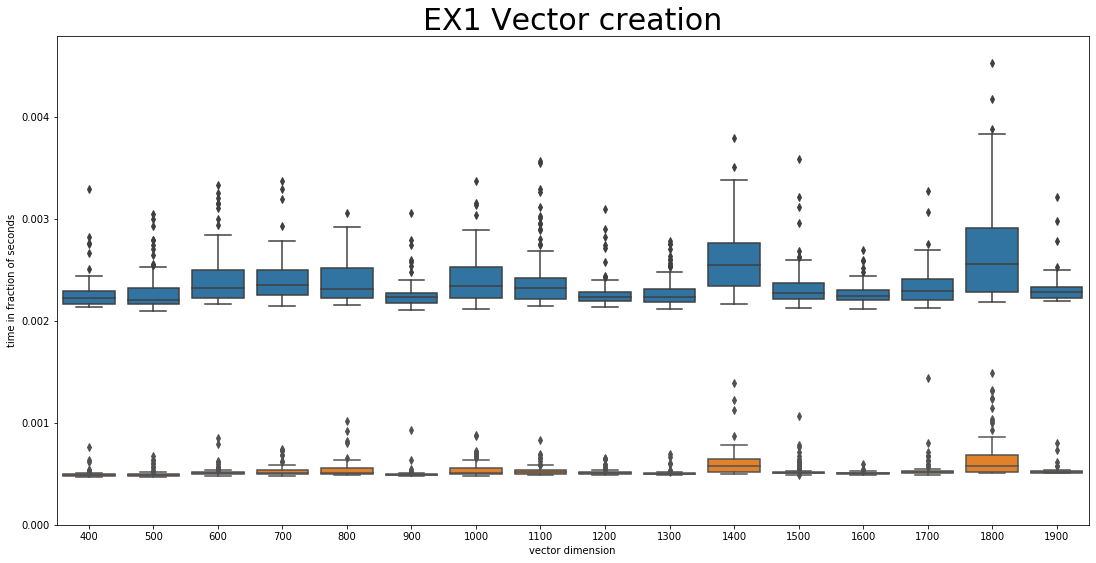

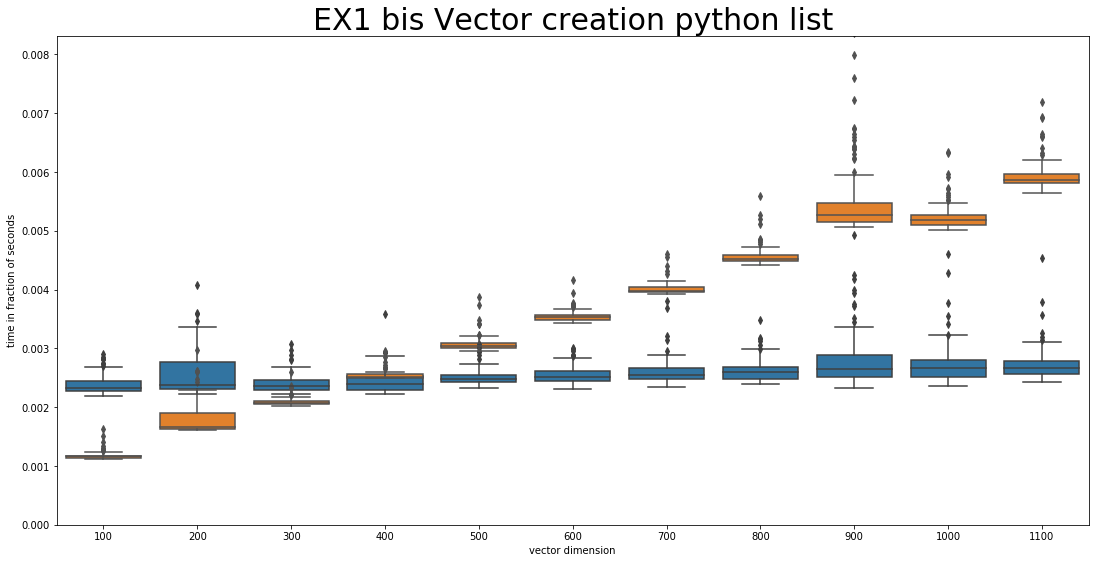

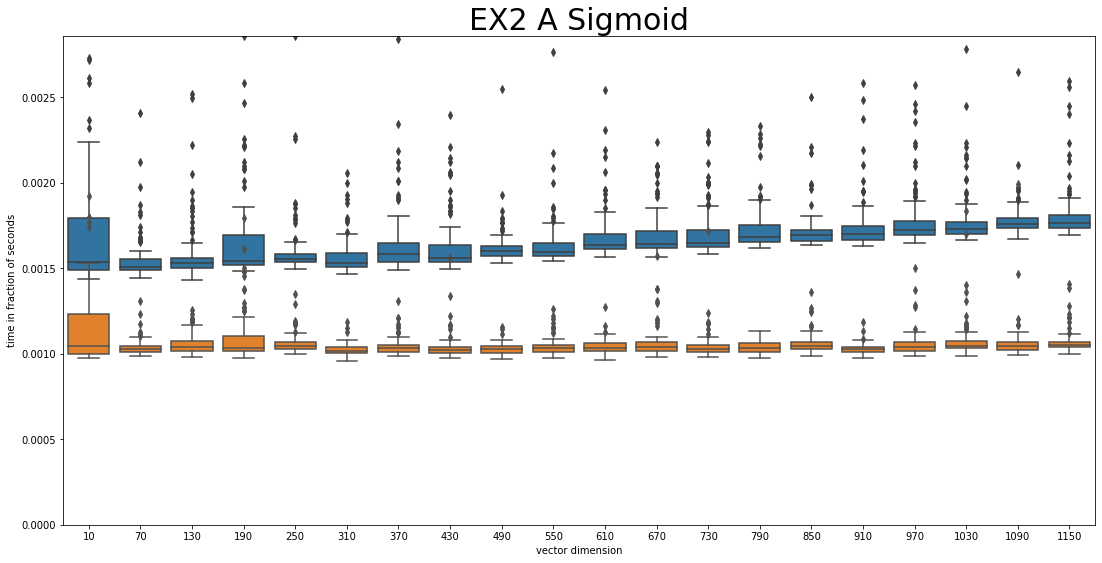

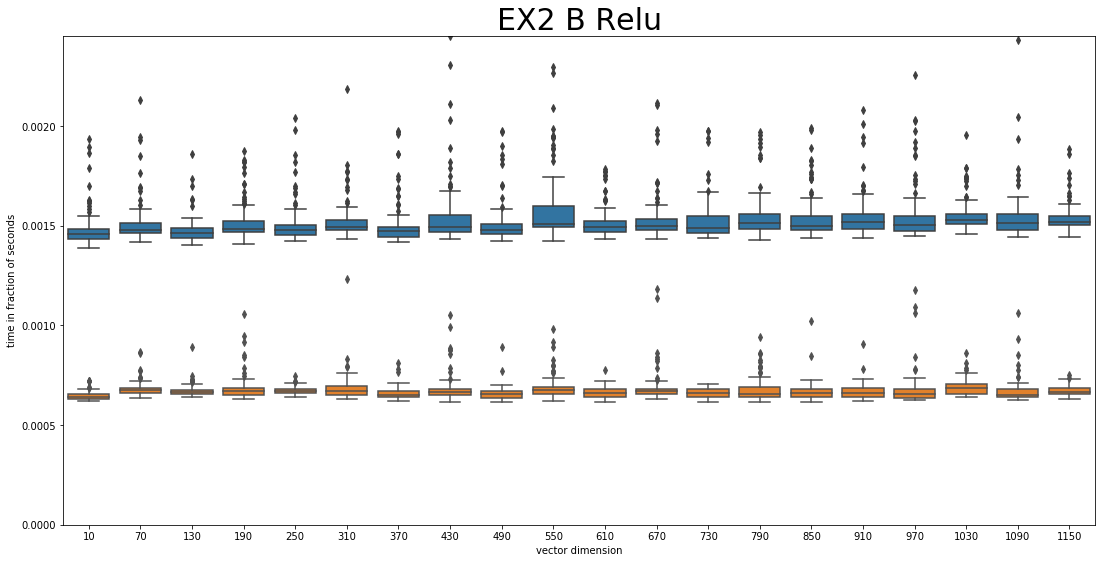

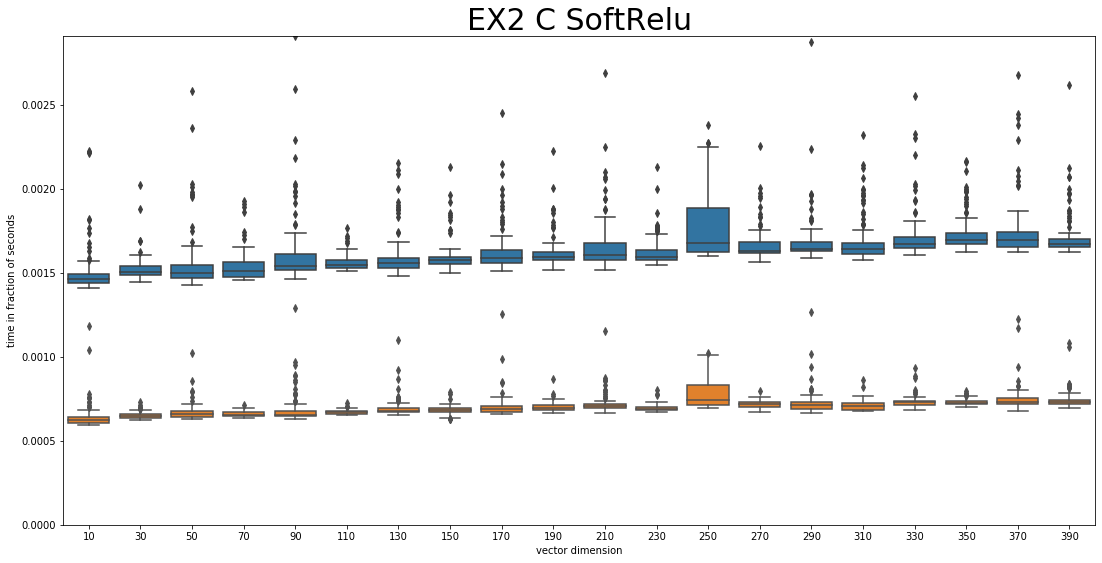

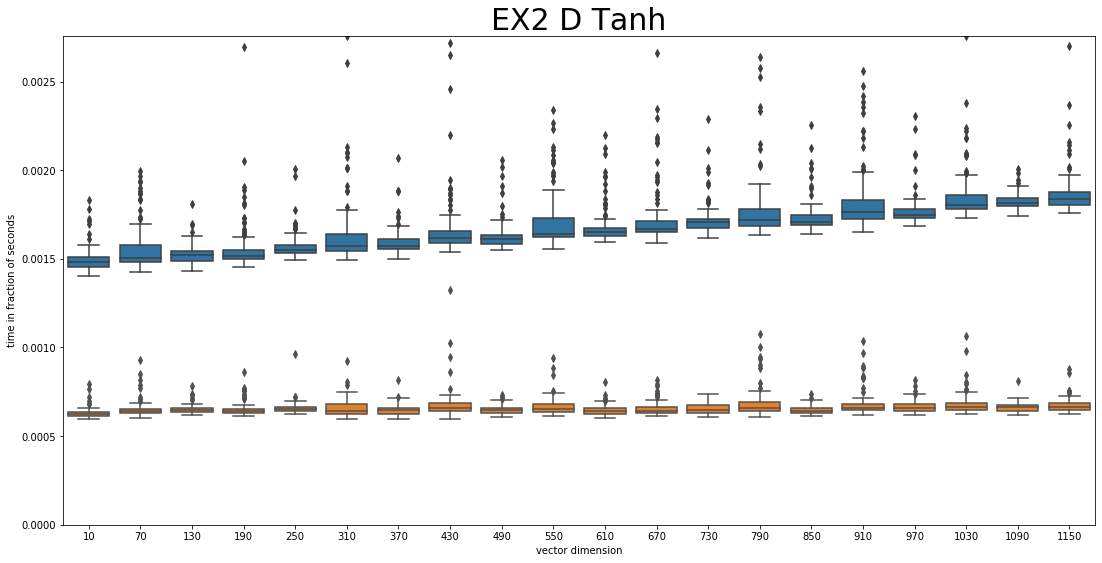

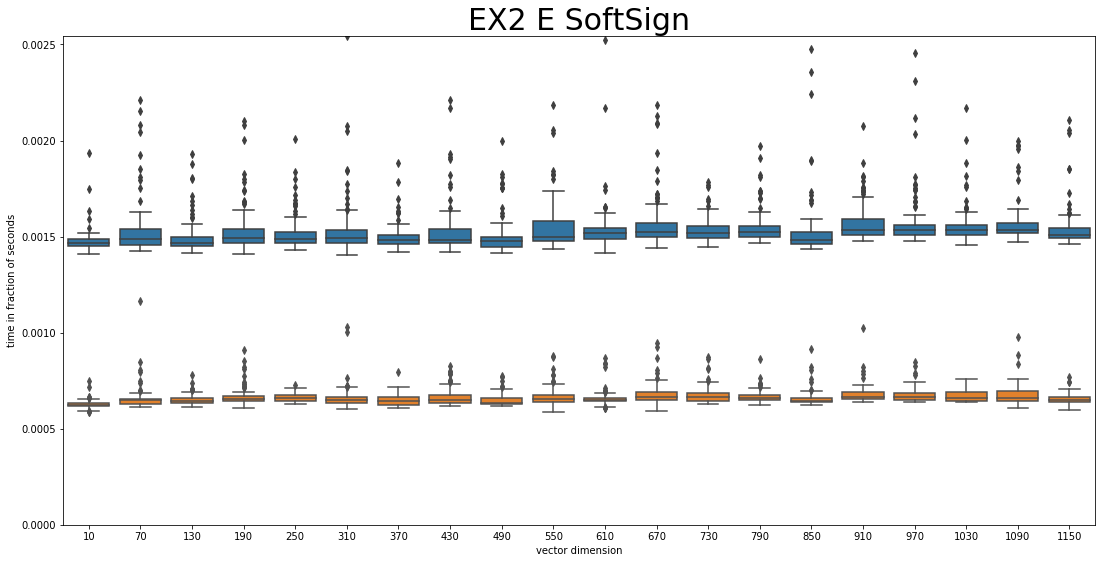

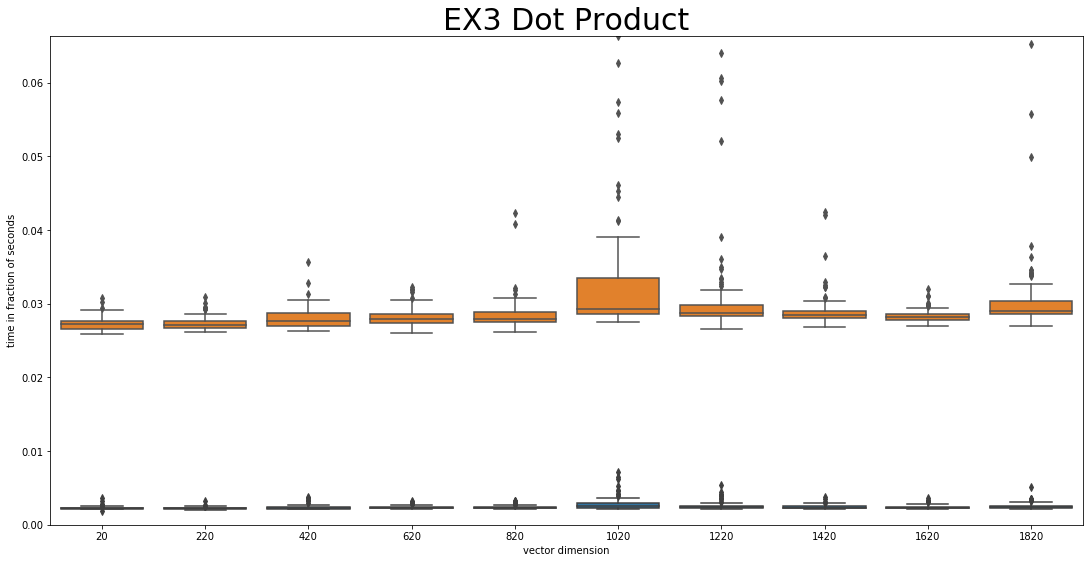

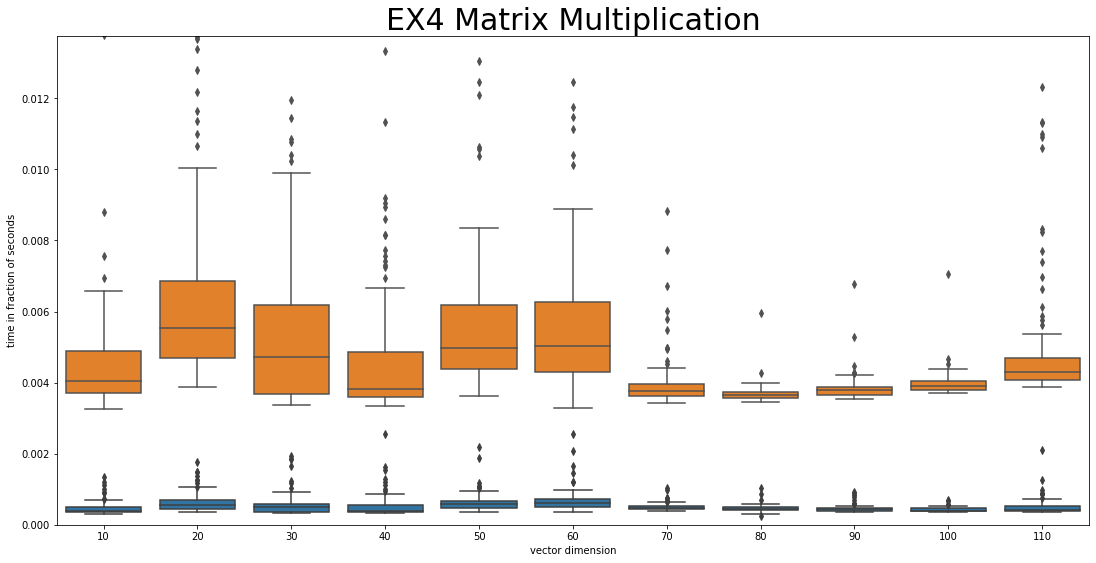

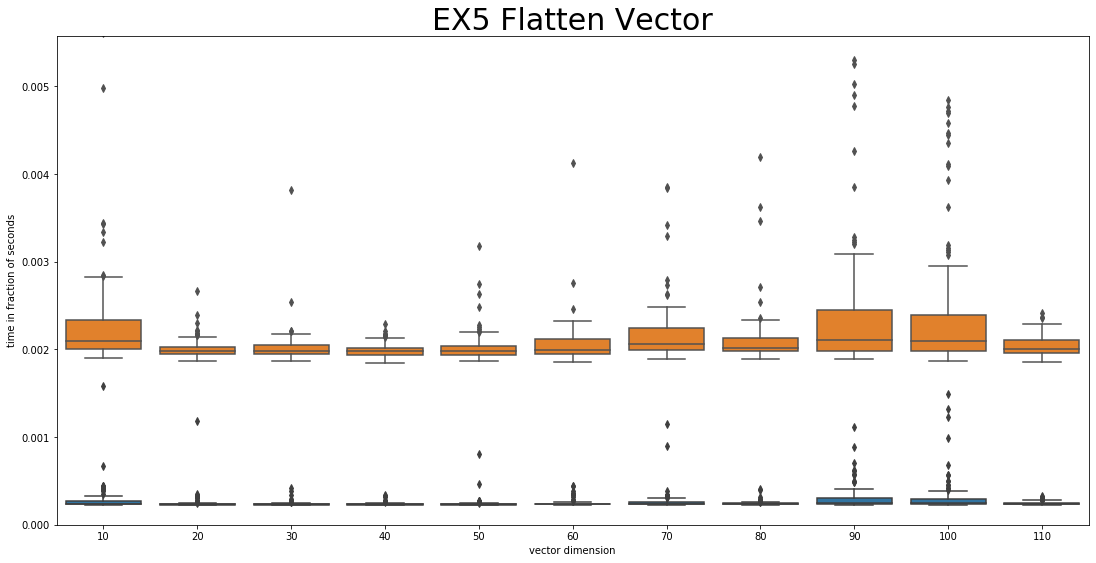

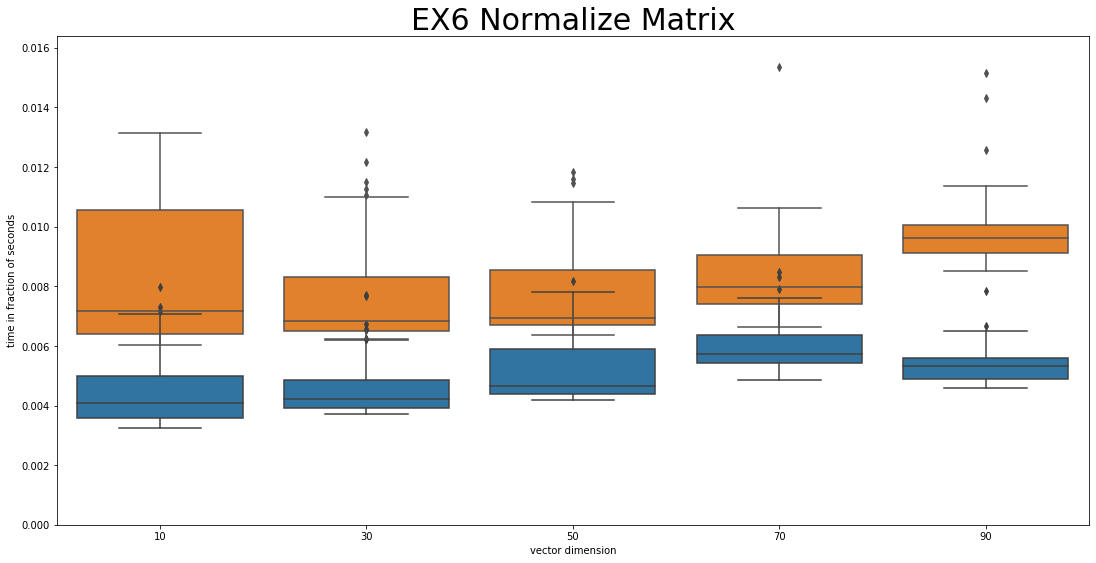

In [24]:
import os

for filename in sorted(os.listdir(os.getcwd())):
    if filename.endswith(".csv"):
        df = pd.read_csv(filename)
        #print(df.head())
        title = filename.split(".")[0].replace("-"," ")
        #print(title)
        cutoff_tf = np.percentile(df["tensorflow"], 99.9)
        cutoff_mx = np.percentile(df["mxnet"], 99.9)
        cutoff = max(cutoff_tf, cutoff_mx)
        #plot_time_vs_dimension_line_errorbar(df, max_value = cutoff)
        plot_time_vs_dimension_boxplot(df, max_value = cutoff, title = title)
        plt.show()
        continue
    else:
        continue